<a href="https://colab.research.google.com/github/ahmadcah/project_pembelajaran_mesin_2018-198/blob/main/GoogleColab/trainPlacesModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    http://data.csail.mit.edu/places/places365/train_256_places365standard.tar \
    -O /content/drive/MyDrive/train_256_places365standard.tar

--2021-10-25 09:34:59--  http://data.csail.mit.edu/places/places365/train_256_places365standard.tar
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26103685120 (24G) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/train_256_places365standard.tar’

/content/drive/MyDr 100%[===================>]  24.31G  65.3MB/s    in 8m 22s  

2021-10-25 09:43:21 (49.6 MB/s) - ‘/content/drive/MyDrive/train_256_places365standard.tar’ saved [26103685120/26103685120]



In [ ]:
!wget --no-check-certificate \
    http://data.csail.mit.edu/places/places365/val_256.tar \
    -O /content/drive/MyDrive/val_256.tar

--2021-10-25 09:31:30--  http://data.csail.mit.edu/places/places365/val_256.tar
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525158400 (501M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/val_256.tar’

/content/drive/MyDr 100%[===================>] 500.83M  27.9MB/s    in 24s     

2021-10-25 09:31:54 (20.9 MB/s) - ‘/content/drive/MyDrive/val_256.tar’ saved [525158400/525158400]



In [ ]:
!wget --no-check-certificate \
    http://data.csail.mit.edu/places/places365/test_256.tar \
    -O /content/drive/MyDrive/test_256.tar 

--2021-10-25 09:32:01--  http://data.csail.mit.edu/places/places365/test_256.tar
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4736829440 (4.4G) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/test_256.tar’

/content/drive/MyDr 100%[===================>]   4.41G  24.1MB/s    in 2m 45s  

2021-10-25 09:34:46 (27.4 MB/s) - ‘/content/drive/MyDrive/test_256.tar’ saved [4736829440/4736829440]



In [1]:
import tarfile

tar = tarfile.open("/content/drive/MyDrive/train_256_places365standard.tar", "r:")
tar.extractall(path='/content')
tar.close()

In [2]:
tar = tarfile.open("/content/drive/MyDrive/test_256.tar", "r:")
tar.extractall(path='/content')
tar.close()

In [3]:
tar = tarfile.open("/content/drive/MyDrive/val_256.tar", "r:")
tar.extractall(path='/content')
tar.close()

In [7]:
tar = tarfile.open("/content/drive/MyDrive/places365standard_easyformat.tar", "r:")
tar.extractall(path='/content')
tar.close()

In [10]:
import tensorflow as tf

TRAINING_DIR = "/content/places365_standard/train"
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/places365_standard/val"
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=126
)

Found 1803460 images belonging to 365 classes.
Found 36500 images belonging to 365 classes.


In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.AveragePooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.GlobalAveragePooling2D(),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(365, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
average_pooling2d_4 (Average (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
average_pooling2d_5 (Average (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
average_pooling2d_6 (Average (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 512)      

In [13]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [14]:
history = model.fit(train_generator, 
                    epochs=25, 
                    steps_per_epoch=20,
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=3)

Epoch 1/25
20/20 [==============================] - 63s 2s/step - loss: 5.9194 - acc: 0.0024 - val_loss: 5.8985 - val_acc: 0.0026
Epoch 2/25
20/20 [==============================] - 43s 2s/step - loss: 5.8981 - acc: 0.0024 - val_loss: 5.8976 - val_acc: 0.0026
Epoch 3/25
20/20 [==============================] - 43s 2s/step - loss: 5.8966 - acc: 0.0036 - val_loss: 5.8992 - val_acc: 0.0026
Epoch 4/25
20/20 [==============================] - 43s 2s/step - loss: 5.9001 - acc: 0.0048 - val_loss: 5.8661 - val_acc: 0.0053
Epoch 5/25
20/20 [==============================] - 43s 2s/step - loss: 5.8582 - acc: 0.0067 - val_loss: 5.8095 - val_acc: 0.0079
Epoch 6/25
20/20 [==============================] - 43s 2s/step - loss: 5.8329 - acc: 0.0032 - val_loss: 5.8791 - val_acc: 0.0079
Epoch 7/25
20/20 [==============================] - 42s 2s/step - loss: 5.8269 - acc: 0.0071 - val_loss: 5.8939 - val_acc: 0.0079
Epoch 8/25
20/20 [==============================] - 43s 2s/step - loss: 5.8031 - acc: 0.00

In [18]:
model2 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.GlobalMaxPooling2D(),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(365, activation='softmax')
])


model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 512)      

In [21]:
model2.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [24]:
history2 = model2.fit(train_generator, 
                    epochs=25, 
                    steps_per_epoch=20,
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=3)

Epoch 1/25
20/20 [==============================] - 43s 2s/step - loss: 5.9001 - acc: 0.0028 - val_loss: 5.8981 - val_acc: 0.0053
Epoch 2/25
20/20 [==============================] - 42s 2s/step - loss: 5.8925 - acc: 0.0020 - val_loss: 5.8953 - val_acc: 0.0000e+00
Epoch 3/25
20/20 [==============================] - 42s 2s/step - loss: 5.8815 - acc: 0.0063 - val_loss: 5.8851 - val_acc: 0.0000e+00
Epoch 4/25
20/20 [==============================] - 42s 2s/step - loss: 5.8670 - acc: 0.0040 - val_loss: 5.8344 - val_acc: 0.0026
Epoch 5/25
20/20 [==============================] - 42s 2s/step - loss: 5.8557 - acc: 0.0028 - val_loss: 5.8002 - val_acc: 0.0053
Epoch 6/25
20/20 [==============================] - 42s 2s/step - loss: 5.8389 - acc: 0.0036 - val_loss: 5.8061 - val_acc: 0.0000e+00
Epoch 7/25
20/20 [==============================] - 41s 2s/step - loss: 5.8192 - acc: 0.0040 - val_loss: 5.7922 - val_acc: 0.0000e+00
Epoch 8/25
20/20 [==============================] - 41s 2s/step - loss: 5.

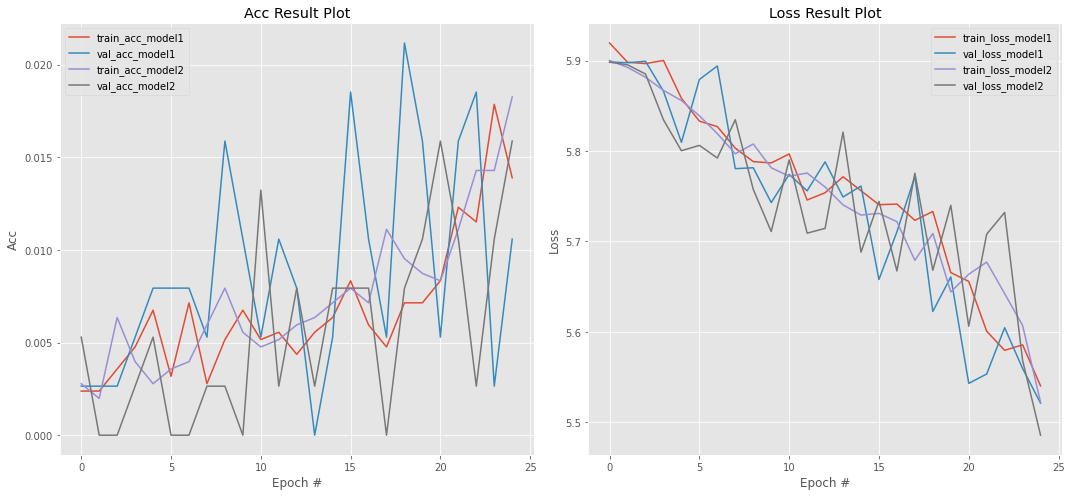

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].plot(np.arange(0, 25), history.history["acc"], label="train_acc_model1")
axes[0].plot(np.arange(0, 25), history.history["val_acc"], label="val_acc_model1")
axes[0].plot(np.arange(0, 25), history2.history["acc"], label="train_acc_model2")
axes[0].plot(np.arange(0, 25), history2.history["val_acc"], label="val_acc_model2")
axes[0].legend()
axes[1].plot(np.arange(0, 25), history.history["loss"], label="train_loss_model1")
axes[1].plot(np.arange(0, 25), history.history["val_loss"], label="val_loss_model1")
axes[1].plot(np.arange(0, 25), history2.history["loss"], label="train_loss_model2")
axes[1].plot(np.arange(0, 25), history2.history["val_loss"], label="val_loss_model2")
axes[1].legend()
plt.setp(axes[0],title='Acc Result Plot', xlabel="Epoch #", ylabel="Acc")
plt.setp(axes[1],title='Loss Result Plot', xlabel="Epoch #", ylabel="Loss")
fig.tight_layout()

In [26]:
model.save('/content/drive/MyDrive/Model/model1places.h5')
model2.save('/content/drive/MyDrive/Model/model2places.h5')